<a href="https://colab.research.google.com/github/ricky-kiva/dl-tensorflow-intro/blob/main/4_a1_happy_or_sad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Happy or Sad?**

Achieve *>= 0.999 accuracy* on Happy or Sad dataset

In [102]:
# import libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile

Download dataset

In [103]:
!wget --no-check-certificate https://storage.googleapis.com/learning-datasets/happy-or-sad.zip

--2023-09-11 09:55:15--  https://storage.googleapis.com/learning-datasets/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.192.207, 209.85.145.207, 209.85.146.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.192.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘happy-or-sad.zip.5’

happy-or-sad.zip.5  100%[===================>]   2.55M  --.-KB/s    in 0.01s   

2023-09-11 09:55:15 (197 MB/s) - ‘happy-or-sad.zip.5’ saved [2670333/2670333]



Extract dataset

In [104]:
# unzip training files
local_zip = './happy-or-sad.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./data')

zip_ref.close()

Referencing the image directory

Sample happy image:


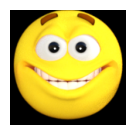


Sample sad image:


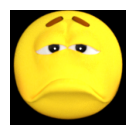

In [105]:
from tensorflow.keras.preprocessing.image import load_img

base_dir = "./data/"
happy_dir = os.path.join(base_dir, 'happy/')
sad_dir = os.path.join(base_dir, 'sad/')

print("Sample happy image:")
plt.imshow(load_img(f'{os.path.join(happy_dir, os.listdir(happy_dir)[12])}'))
plt.gcf().set_size_inches(1.5, 1.5)
plt.axis('off')
plt.show()

print("\nSample sad image:")
plt.imshow(load_img(f'{os.path.join(sad_dir, os.listdir(sad_dir)[15])}'))
plt.gcf().set_size_inches(1.5, 1.5)
plt.axis('off')
plt.show()

Inspect image shape

In [106]:
from tensorflow.keras.preprocessing.image import img_to_array

sample_image = load_img(f'{os.path.join(happy_dir, os.listdir(happy_dir)[0])}')
sample_array = img_to_array(sample_image)

print(f'Each image has shape: {sample_array.shape}')
print(f'Maximum pixel value used: {np.max(sample_array)}')

Each image has shape: (150, 150, 3)
Maximum pixel value used: 255.0


In [107]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') is not None and logs.get('accuracy') > 0.999:
      print('\nReached 99.9% accuracy so cancelling training!')
      self.model.stop_training = True

Make function to preprocess the data

In [108]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def image_generator():
  train_datagen = ImageDataGenerator(rescale=1/255)
  train_generator = train_datagen.flow_from_directory(directory=base_dir,
                                                      target_size=(150, 150),
                                                      batch_size=10,
                                                      class_mode='binary')

  return train_generator

Save generator to variable

In [109]:
gen = image_generator()

Found 80 images belonging to 2 classes.


In [113]:
from tensorflow.keras import optimizers, losses

def train_happy_sad_model(train_generator):

  # instantiate callback
  callbacks = myCallback()

  model = tf.keras.models.Sequential([
    # first convolution layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    # second convolution layer
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    # third convolution layer
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    # fully connected layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss=losses.BinaryCrossentropy(),
                optimizer=optimizers.RMSprop(learning_rate=0.0001),
                metrics=['accuracy'])

  history = model.fit(x=train_generator,
                      epochs=20,
                      callbacks=[callbacks])

  return history

Train the model

In [114]:
hist = train_happy_sad_model(gen)

Epoch 1/20
6/8 [=====================>........] - ETA: 0s - loss: 0.8674 - accuracy: 0.5000

8/8 [==============================] - 4s 51ms/step - loss: 0.8153 - accuracy: 0.5375
Epoch 2/20
8/8 [==============================] - 0s 50ms/step - loss: 0.6271 - accuracy: 0.6750
Epoch 3/20
8/8 [==============================] - 0s 52ms/step - loss: 0.4579 - accuracy: 0.8500
Epoch 4/20
8/8 [==============================] - 0s 51ms/step - loss: 0.3572 - accuracy: 0.8000
Epoch 5/20
8/8 [==============================] - 0s 52ms/step - loss: 0.2399 - accuracy: 0.9000
Epoch 6/20
8/8 [==============================] - 0s 50ms/step - loss: 0.1643 - accuracy: 0.9375
Epoch 7/20
8/8 [==============================] - 0s 50ms/step - loss: 0.1185 - accuracy: 0.9500
Epoch 8/20
8/8 [==============================] - 0s 51ms/step - loss: 0.1245 - accuracy: 0.9625
Epoch 9/20
8/8 [==============================] - 0s 49ms/step - loss: 0.1228 - accuracy: 0.9250
Epoch 10/20
8/8 [==============================] - 0s 52ms/step - loss: 0.0672 - accuracy: 0.9750
Epoch 11/20
8/8 [=======================

Check if model stopped before or at least in 15 epoch

In [115]:
print(f"Your model reached the desired accuracy after {len(hist.epoch)} epochs")

Your model reached the desired accuracy after 15 epochs
